In [1]:
import tfscreen 
from tfscreen.analysis import cat_response
from tfscreen.plot import cat_fits

import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint


### read in data

These are estimates of theta and theta standard error versus iptg for different genotypes

In [2]:
theta_df = tfscreen.util.read_dataframe("demo-theta.csv")
theta_df

,genotype,iptg,theta_est,theta_std,enough_obs
0,wt,0.0000,8.872773e-01,0.004187,True
1,wt,0.0001,8.914220e-01,0.004202,True
2,wt,0.0010,8.780028e-01,0.004193,True
3,wt,0.0030,8.450930e-01,0.004225,True
4,wt,0.0100,6.603482e-01,0.004286,True
...,...,...,...,...,...
80795,E36Y/V95Y,0.0030,9.999997e-01,0.197493,True
80796,E36Y/V95Y,0.0100,4.324321e-01,0.208380,True
80797,E36Y/V95Y,0.0300,3.059023e-07,0.197729,True
80798,E36Y/V95Y,0.1000,9.990770e-02,0.193193,True


### categorize response

`cat_response` fits a collection of models to theta vs. iptg and then selects the best-fitting model using an AIC test. 

In [4]:
from tfscreen.analysis.cat_response.cat_library import MODEL_LIBRARY
print("models to try fit")
for k in MODEL_LIBRARY.keys():
    print(f"    {k}")
print()
print("Doing fits")

genotypes = pd.unique(theta_df["genotype"])[:2]
small_theta_df = theta_df.loc[theta_df["genotype"].isin(genotypes),:]
model_dfs, summary_df, pred_df = cat_response(df=small_theta_df,
                                              x_column="iptg",
                                              y_column="theta_est",
                                              y_std_column="theta_std")

models to try fit
    flat
    linear
    repressor
    inducer
    hill_repressor
    hill_inducer
    bell_peak
    bell_dip
    biphasic_peak
    biphasic_dip

Doing fits


  0%|          | 0/2 [00:00<?, ?it/s]

### look at outputs

+ **model_dfs**: dictionary keying model to fit parameters for each genotype.
+ **summary_df**: pandas DataFrame holding fit statistics for each genotype fit to every model
+ **pred_df**: predicted output vs. iptg for all models. 

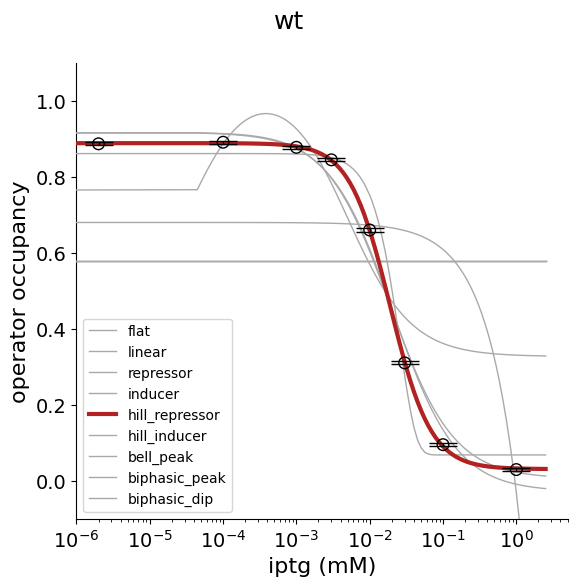

Best model is 'hill_repressor'
Model fit parameters
baseline_est     0.889018
amplitude_est   -0.858125
lnK_est         -3.962346
n_est            1.563551
baseline_std     0.002159
amplitude_std    0.004316
lnK_std          0.012454
n_std            0.025999
is_best_model        True
R2                0.99994
AIC_weight            1.0
Name: wt, dtype: object


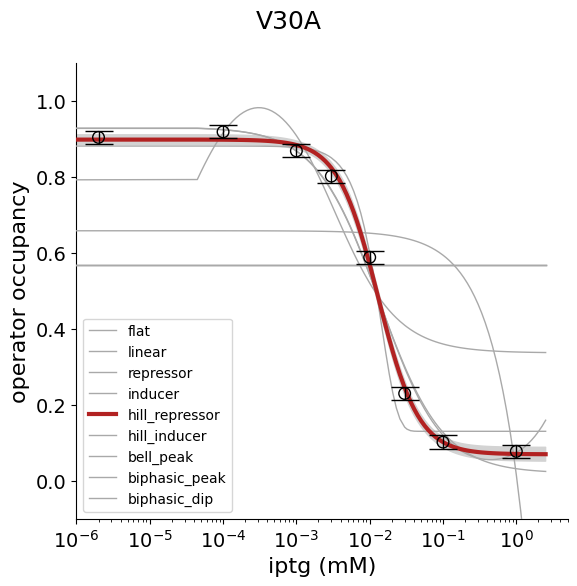

Best model is 'hill_repressor'
Model fit parameters
baseline_est     0.898417
amplitude_est    -0.82852
lnK_est         -4.341176
n_est             1.57534
baseline_std     0.012704
amplitude_std     0.02372
lnK_std          0.071192
n_std            0.155453
is_best_model        True
R2               0.998087
AIC_weight       0.996783
Name: V30A, dtype: object


In [5]:
# Go through our test genotypes
for g in genotypes:

    # Grab experimental data
    expt_df = small_theta_df.loc[small_theta_df["genotype"] == g,:]

    # cat_fits plots all fits given 
    fig, ax = cat_fits(x=expt_df["iptg"],
                       y=expt_df["theta_est"],
                       y_std=expt_df["theta_std"],
                       pred_df=pred_df.loc[g,:],
                       title=g)
    plt.show()

    best_model = summary_df.loc[g,"best_model"]
    best_model_param_df = model_dfs[best_model]
    print(f"Best model is '{best_model}'")
    print("Model fit parameters")
    pprint(best_model_param_df.loc[g,:])